## Численное решение задачи Коши методом Эйлера

### Галимзянов Рафиль Рафикович
#### Телефон: +79083395505
#### Telegram: https://t.me/rafil_galimzyanov
#### Почта: rafil.galimzyanov.00@bk.ru

### Ответы на вопросы:
#### 1. В основном использовал функциональное программирование. Python, иногда совместно с matlab, переписывая на python. 
#### 2. Решение задачи регрессии для получения строгих границ зашкала шумометрического прибора, разработка алгоритма подбора оптимального частотного диапазона для нахождения полной мощности шума, написание эмпирической модели для линейного описание профилей спектральной плотности мощности шума и т.д. 
#### 3. Готов на фул тайм, хотелось бы от 70 до 100
#### 4. Примеры вычислительных задач:
- https://github.com/RafilGalimzyanov/Studies-Training/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%A3%D0%9C%D0%A4/test_mf_ex1.ipynb
- https://github.com/RafilGalimzyanov/Studies-Training/tree/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20%D0%BF%D0%BE%20%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D1%83%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85
- https://github.com/RafilGalimzyanov/Studies-Training/blob/main/%D0%94%D0%A3_%D0%BB%D0%B0%D0%B7%D0%B5%D1%80/%D0%94%D0%A3_2%D1%85.ipynb
- https://github.com/RafilGalimzyanov/Studies-Training/blob/main/%D0%92%D1%8B%D1%81%D0%BE%D0%BA%D0%BE%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%B2%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F/grad_min.ipynb
- https://github.com/RafilGalimzyanov/Studies-Training/blob/main/%D0%A4%D1%83%D1%80%D1%8C%D0%B5%20%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%D1%81%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D1%8E%D1%89%D0%B5%D0%B9%20%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B5%D0%B9/EX_1.ipynb

#### 5. Магистерская работа связана с моделированием процессов акустической эмиссии при течении жидкости/газа по трубе. Поэтому приходилось работать с данными, решать диффуры (Уравнение теплопроводности).
#### 6. Python
#### 7. tg: https://t.me/rafil_galimzyanov


<IPython.core.display.Javascript object>


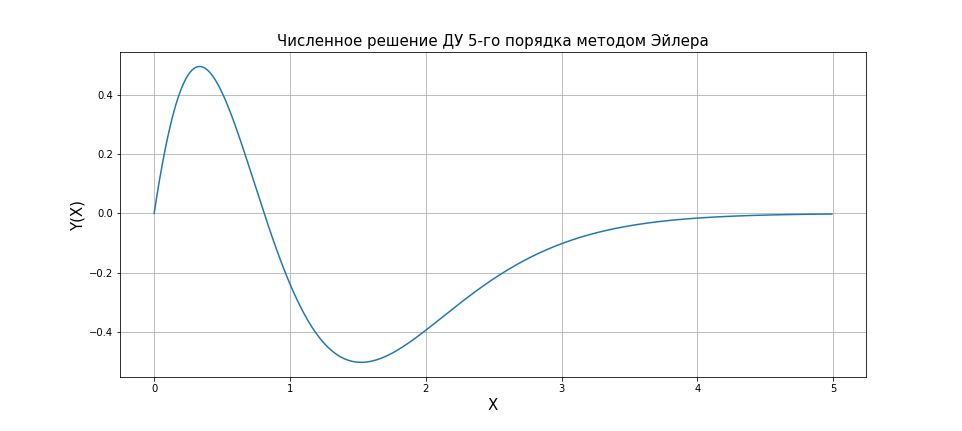

In [202]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


"""
Начальные условия и константы
"""

(y10, y20, y30, y40, y50) = (0, 3, -9, -8, 0) # Начальные условия
(a5, a4, a3, a2, a1, a0) = (1, 15, 90, 270, 405, 243) # Коэфициенты при ДУ
h = 0.01 # Шаг сетки
x = [0, 5] # Границы по х

"""
Функция initial_conditions заполняет одномерные массивы Y начальными условиями
"""
def initial_conditions():
    Y1, Y2, Y3, Y4, Y5 = [], [], [], [], []
    Y1.append(y10)
    Y2.append(y20)
    Y3.append(y30)
    Y4.append(y40)
    Y5.append(y50)
    return Y1, Y2, Y3, Y4, Y5

"""
Функция euler заполняет массивы Y по заданному алгоритму Эйлера
"""
def euler():
    Y1, Y2, Y3, Y4, Y5 = initial_conditions()
    for i in np.arange(x[0]+h, x[1], h):
        Y5.append(Y5[-1]+h*((-1)*a0*Y1[-1]+(-1)*a1*Y2[-1]+(-1)*a2*Y3[-1]+(-1)*a3*Y4[-1]+(-1)*a4*Y5[-1])/a5)
        Y4.append(Y4[-1]+h*Y5[-2])
        Y3.append(Y3[-1]+h*Y4[-2])
        Y2.append(Y2[-1]+h*Y3[-2])
        Y1.append(Y1[-1]+h*Y2[-2])
    return Y1, Y2, Y3, Y4, Y5
        

Y1, Y2, Y3, Y4, Y5 = euler()

"""
Строим график численного решения
"""
plt.title('Численное решение ДУ 5-го порядка методом Эйлера', size = 15)
plt.plot(np.arange(x[0], x[1], h), Y1)
plt.xlabel("X", size = 15)
plt.ylabel("Y(X)", size = 15)
plt.grid()
plt.show()

## Для обоснования точности численных результатов найдём аналитическое решение Y(x)

### $$Характеристическое\:уравнение:\\ x^5+15\cdot x^4+90\cdot x^3+270\cdot x^2+405\cdot x+243=0 \\ (x+3)^5=0 \\ 
То\:есть\:общее\:решение: y = С_{1}\cdot e^{-3x}+С_{2}\cdot e^{-3x}\cdot x+С_{3}\cdot e^{-3x}\cdot x^2
+С_{4}\cdot e^{-3x}\cdot x^3 + С_{5}\cdot e^{-3x}\cdot x^4 $$


In [191]:
from sympy import*

def func():
    return (c1+c2*x+c3*x**2+c4*x**3+c5*x**4)*exp(-3*x)

x, c1, c2, c3, c4, c5 = symbols('x C1 C2 C3 C4 C5')

a0 = diff(func(), x, 0)
a1 = diff(func(), x, 1)
a2 = diff(func(), x, 2)
a3 = diff(func(), x, 3)
a4 = diff(func(), x, 4)

a0.evalf(subs={x:0})
a1.evalf(subs={x:0})
a2.evalf(subs={x:0})
a3.evalf(subs={x:0})
a4.evalf(subs={x:0})

print(f"С1 = 0,\n{a1.evalf(subs={x:0})} = 3\n{a2.evalf(subs={x:0})} = -9\n"
      f"{a3.evalf(subs={x:0})} = -8\n{a4.evalf(subs={x:0})} = 0")

С1 = 0,
-3.0*C1 + C2 = 3
9.0*C1 - 6.0*C2 + 2.0*C3 = -9
-27.0*C1 + 27.0*C2 - 18.0*C3 + 6.0*C4 = -8
81.0*C1 - 108.0*C2 + 108.0*C3 - 72.0*C4 + 24.0*C5 = 0


### $$ С\:учётом\:НУ: y = 3\cdot e^{-3x}\cdot x+4.5\cdot e^{-3x}\cdot x^2
-\frac{4}{3}\cdot e^{-3x}\cdot x^3 -10.75\cdot e^{-3x}\cdot x^4 $$

<IPython.core.display.Javascript object>


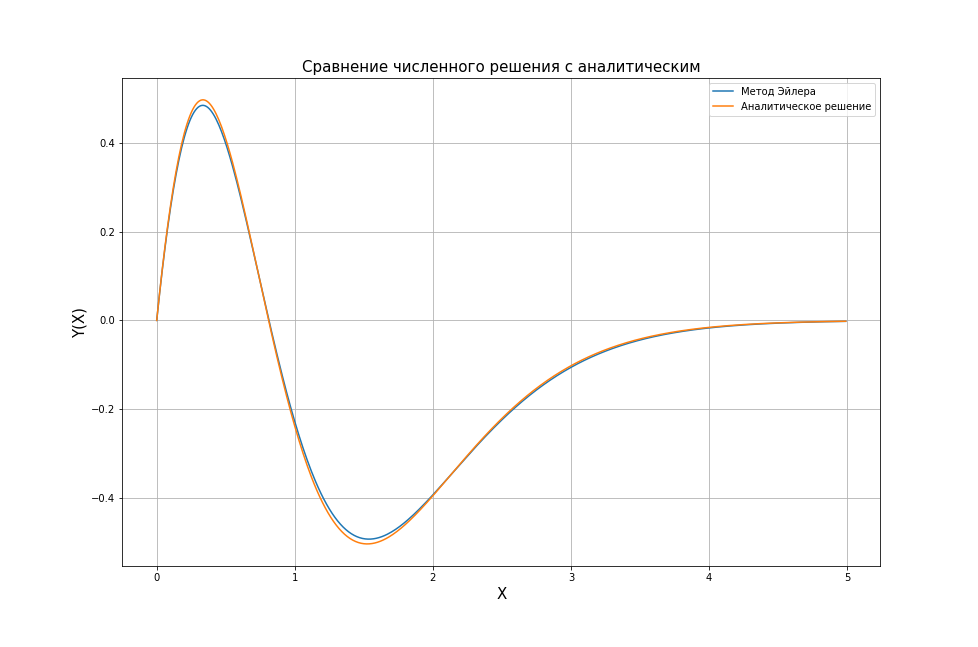

In [213]:
def real_func(x):
    return (3*x+4.5*x**2-(4/3)*x**3-10.75*x**4)*np.exp(-3*x)

x_range = np.arange(x[0], x[1], h)
y_real = real_func(x_range)

plt.figure(figsize=(10, 10))
plt.title('Сравнение численного решения с аналитическим', size = 15)
plt.plot(x_range, y_real, x_range, Y1)
plt.grid()

plt.legend(('Метод Эйлера', 'Аналитическое решение'))
plt.xlabel("X", size = 15)
plt.ylabel("Y(X)", size = 15)

plt.show()

## Взаимная корреляция двух решений: 

In [216]:
np.corrcoef(y_real, Y1)[0, 1]

0.9998917083503703

## Вывод:
### - Результаты численного решения с хорошей точностью коррелируют с данными, полученными аналитически